Import 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os


In [3]:
sys.path.append('../')
from scripts.preprocess import Preprocess
from scripts.logger import Logger
from scripts.plot import Plot
from scripts.utilities import Utilities

preprocess = Preprocess()
plot = Plot()
utils = Utilities()

Load raw dataframe

In [4]:
train_df = utils.get_df(path='data/train.csv',rep='../',rev='tagv1')
test_df = utils.get_df(path='data/test.csv',rep='../', rev='tagv1')
store_df = utils.get_df(path='data/store.csv',rep='../',rev='tagv1')
sub_df = utils.get_df(path='data/sample_submission.csv', rep='../', rev='tagv1')


/home/nardos/Documents/10Academy/Pharmaceutical/Pharmaceutical-Sales-Prediction/notebooks/../scripts/utilities.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(io.StringIO(data))


Load Preprocessed dataframe

In [18]:
train_store = pd.read_csv('../data/train_store.csv')
test_store = pd.read_csv('../data/test_store.csv')
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [6]:
train_df["Date"]

0          2015-07-31
1          2015-07-31
2          2015-07-31
3          2015-07-31
4          2015-07-31
              ...    
1017204    2013-01-01
1017205    2013-01-01
1017206    2013-01-01
1017207    2013-01-01
1017208    2013-01-01
Name: Date, Length: 1017209, dtype: object

Extact Month from data

In [7]:
train_store = preprocess.to_datetime(train_df, 'Date')
train_store.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [8]:
# Separating the date column for further analysis
preprocess.to_datetime(train_df, 'Date')
train_store['Year'] =  train_store['Date'].apply(lambda x: x.year)
train_store['Month'] = train_store['Date'].apply(lambda x: x.month)
train_store['DayOfMonth'] = train_df['Date'].apply(lambda x: x.day)
# Identifying if the day is weekend or weekday
train_store['Weekday'] = train_store['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1) 

In [9]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,Weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,1
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,1
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,1


Distribution of training and test sets 

In [10]:
# sns.lineplot(x="Month", y="Sales",
#              hue="Store", 
#              data=train_store)

In [11]:
# aggregated df from sales mean and custmers mean
seasonal = train_df.groupby('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[2:,:]
seasonal.head()

,Sales,Customers
StateHoliday,,
a,290.735686,43.817670
b,214.311510,36.561883
c,168.733171,27.174390


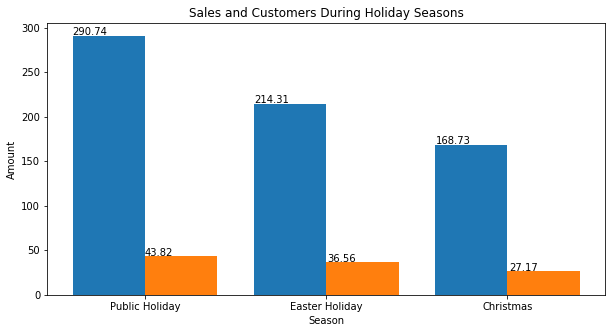

In [12]:
# seasonal index
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, seasonal['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                       * 1.005, p.get_height() * 1.005))     
plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales and Customers During Holiday Seasons")
plt.show()


- We can see from the above comparation "no holiday" has more purchase
- public holidays have more  purchase,
- Christmas has the least purchase sales

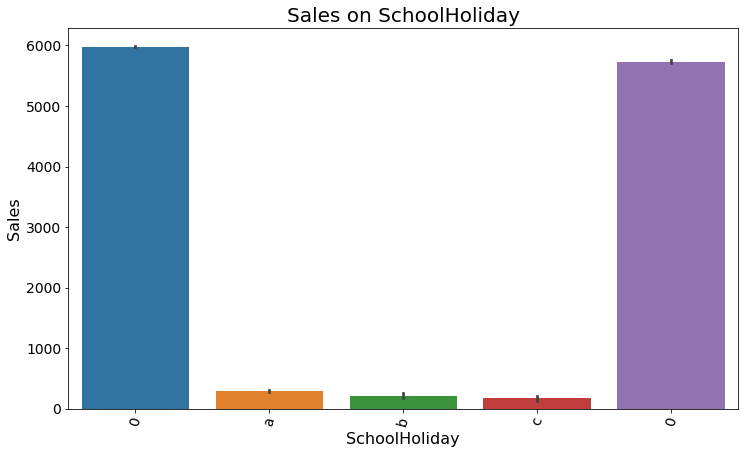

In [13]:
plot.plot_bar(train_df, 'StateHoliday', 'Sales', 'Sales on SchoolHoliday', 'SchoolHoliday', 'Sales')

Seasonal (Christmas, Easter etc) purchase behaviours,

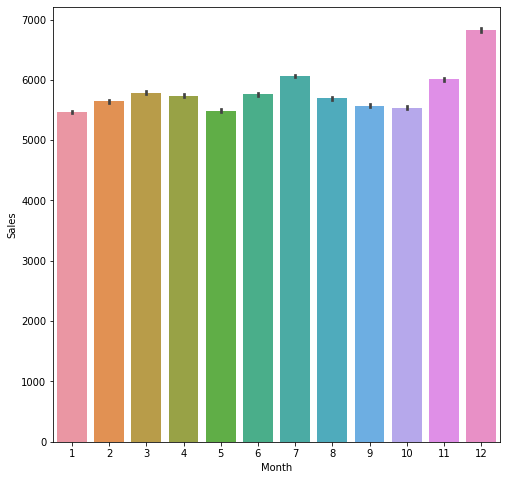

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(x='Month', y='Sales', data=train_df)
plt.show()

In [15]:
year_df = train_df.groupby(['Year'])['Sales'].mean().reset_index()
year_df

,Year,Sales
0,2013,5658.533675
1,2014,5833.290704
2,2015,5878.245380


In [16]:
# train_df.columns
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'Weekday'],
      dtype='object')

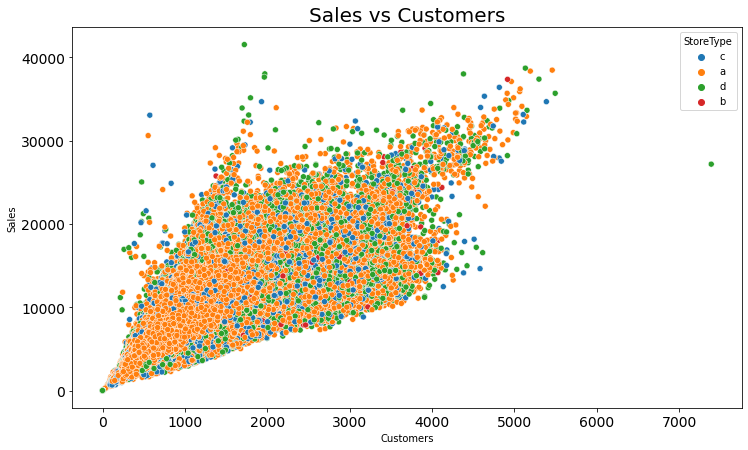

In [19]:
sale_cust= ["Sales", "Customers"]
plot.plot_scatter(train_df[sale_cust], train_df['Customers'], train_df['Sales'], 'Sales vs Customers', train_store['StoreType'], None)

Show that there is a positive correlation between the number of sales and the number of customers